In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
%cd /content/drive/My Drive/Dataset
!ls

Mounted at /content/drive
/content/drive/My Drive/Dataset
 20191002-items.csv     heart.csv
 20191002-reviews.csv   Housing.csv
'Air Quality.csv'       image_predict
'archive (10).zip'     'Lazada (bisa yok).ipynb'
 bestvalue	        model.png
 Car_Rates.csv	        New_York_cars.csv
 customer_data.csv      New_York_cars.gsheet
 data_stem1.csv        'Revisian3 - Copy.docx'
 data_stem2.csv         Rice_Image_Train_Validation_Test
 data_stem3.csv         rice_image.zip
 data_stem4.csv         satellite_image.zip
 diabetes.csv	        train.csv
'Heart Attack.csv'      untitled_project


In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Muat model dari file
# loaded_model = load_model("/content/drive/My Drive/model_img.h5")

In [ ]:
#load image of a dog
import tensorflow as tf
from tensorflow.keras import (datasets, layers, models)
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

loaded_model = tf.keras.models.load_model("/content/drive/My Drive/model_img.h5")
rocky = image.load_img("/content/drive/My Drive/Dataset/image_predict/9948.jpg", target_size=(150,150))
rocky_as_tensor = image.img_to_array(rocky)
rocky_as_tensor = np.expand_dims(rocky_as_tensor, axis=0)
rocky_as_tensor /= 255
print("shape", rocky_as_tensor.shape)

#get layer for catch the output

# layer_outputs = [layer.output for layer in loaded_model.layers[:8]]
# layer_outputs = [layer.output for layer in loaded_model.layers[:10]]
layer_outputs = [layer.output for layer in loaded_model.layers]
activation_model = models.Model(inputs=loaded_model.input, outputs=layer_outputs)
#fed the model with the image
activations = activation_model.predict(rocky_as_tensor)

dog shape (1, 150, 150, 3)
1/1 [==============================] - 8s 8s/step


In [ ]:
# #take only the conv layers ( we filter out the max pool layers)
# conv_indixes = []
# for i in range(len(activations)):
#     if( "conv2d" in loaded_model.layers[i].name) :
#         conv_indixes.append(i)
#         print("Layer: ", loaded_model.layers[i].name, " Shape: ", activations[i].shape)

In [ ]:
conv_and_pool_indices = []
for i in range(len(activations)):
    layer_name = loaded_model.layers[i].name
    if "conv2d" in layer_name or "max_pooling2d" in layer_name:
        conv_and_pool_indices.append(i)
        print("Layer:", layer_name, "Shape:", activations[i].shape)


Layer: conv2d_5 Shape: (1, 148, 148, 32)
Layer: max_pooling2d_5 Shape: (1, 74, 74, 32)
Layer: conv2d_6 Shape: (1, 72, 72, 32)
Layer: max_pooling2d_6 Shape: (1, 36, 36, 32)
Layer: conv2d_7 Shape: (1, 34, 34, 64)
Layer: max_pooling2d_7 Shape: (1, 17, 17, 64)
Layer: conv2d_8 Shape: (1, 15, 15, 64)
Layer: max_pooling2d_8 Shape: (1, 7, 7, 64)
Layer: conv2d_9 Shape: (1, 5, 5, 64)
Layer: max_pooling2d_9 Shape: (1, 2, 2, 64)


In [ ]:
loaded_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 17, 17, 64)      

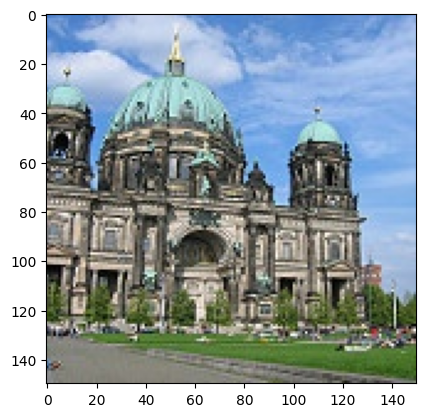

In [ ]:
  plt.imshow(rocky)
  plt.show()

# **Conv & Max Pool**

Processing conv2d_5 layer...


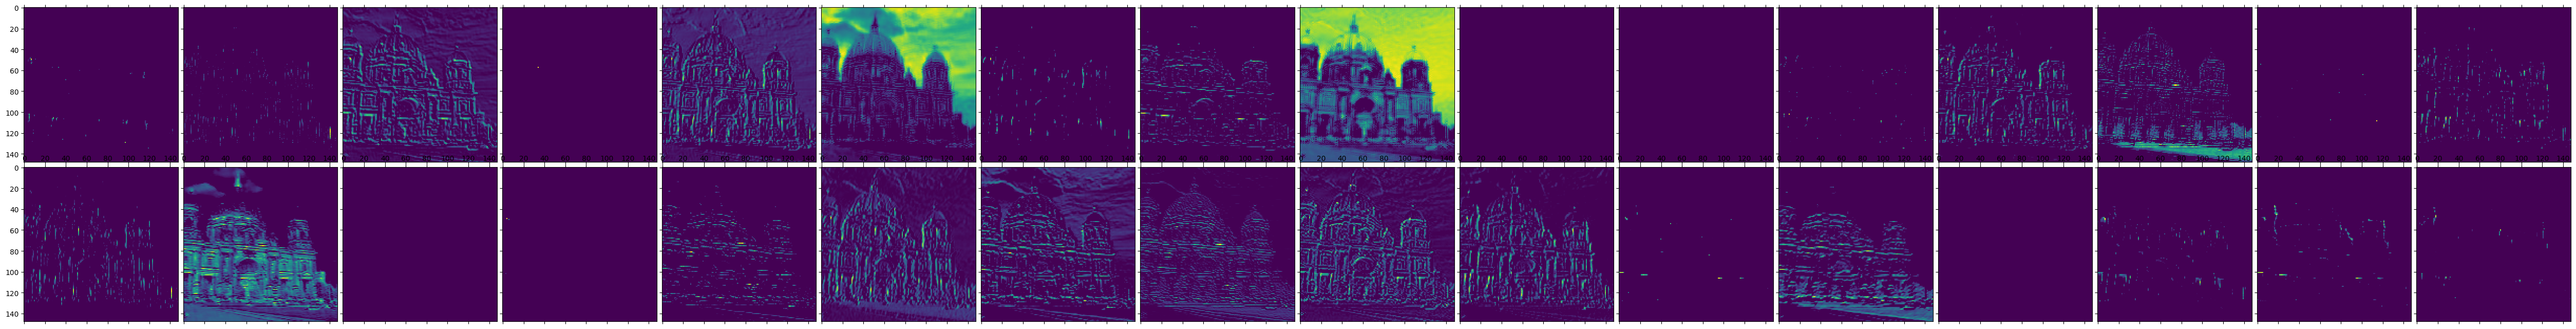

Processing max_pooling2d_5 layer...


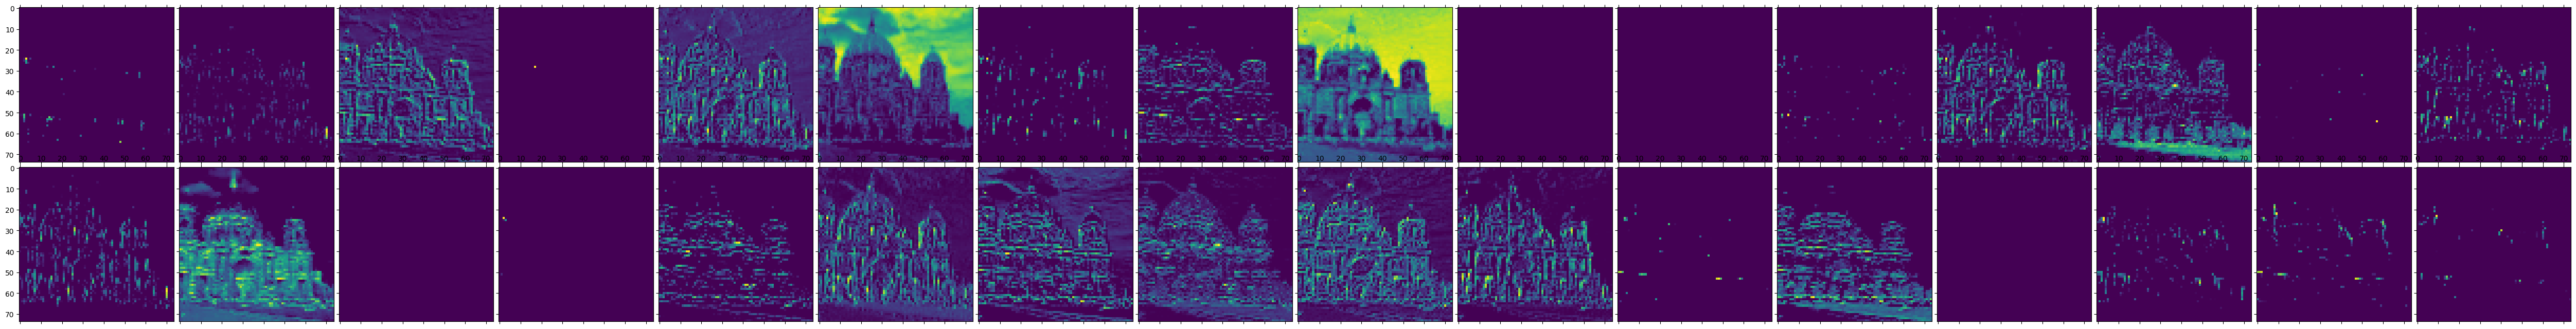

Processing conv2d_6 layer...


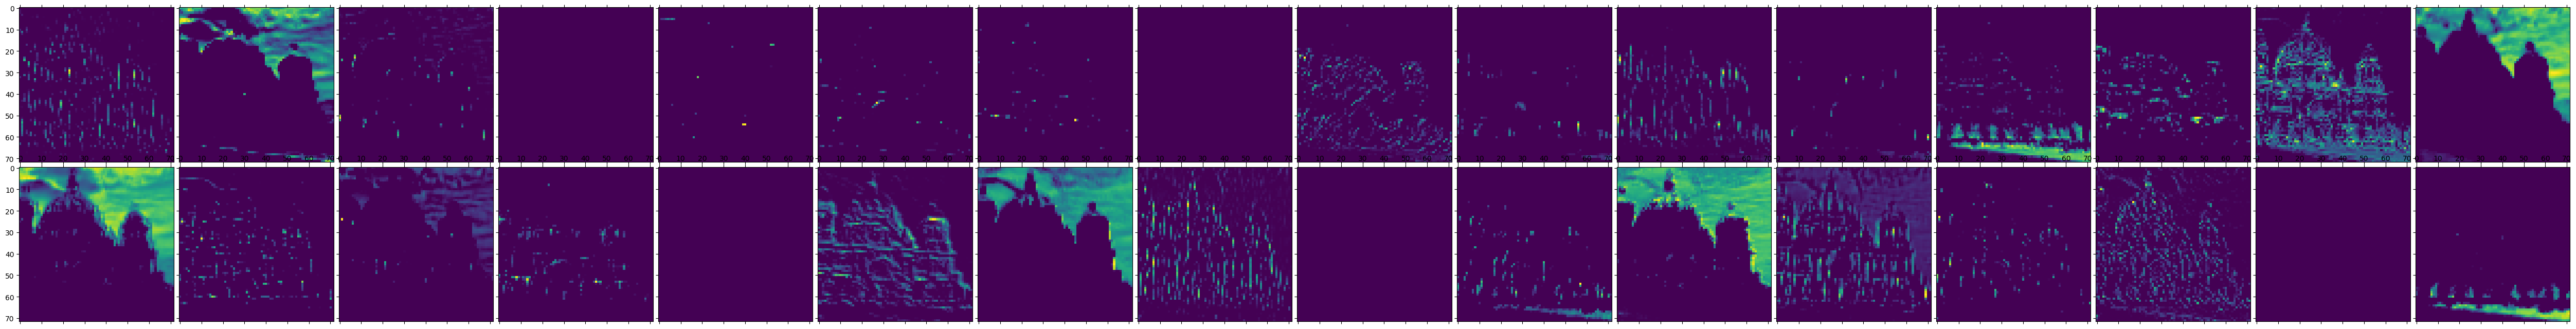

Processing max_pooling2d_6 layer...


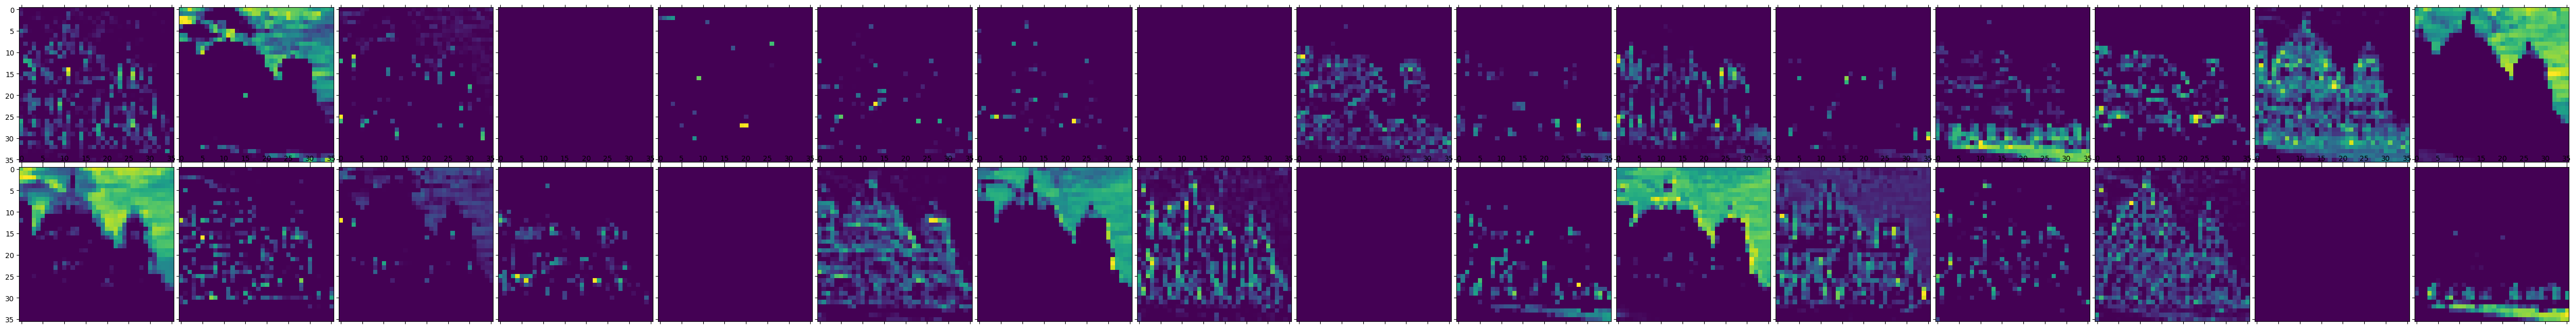

Processing conv2d_7 layer...


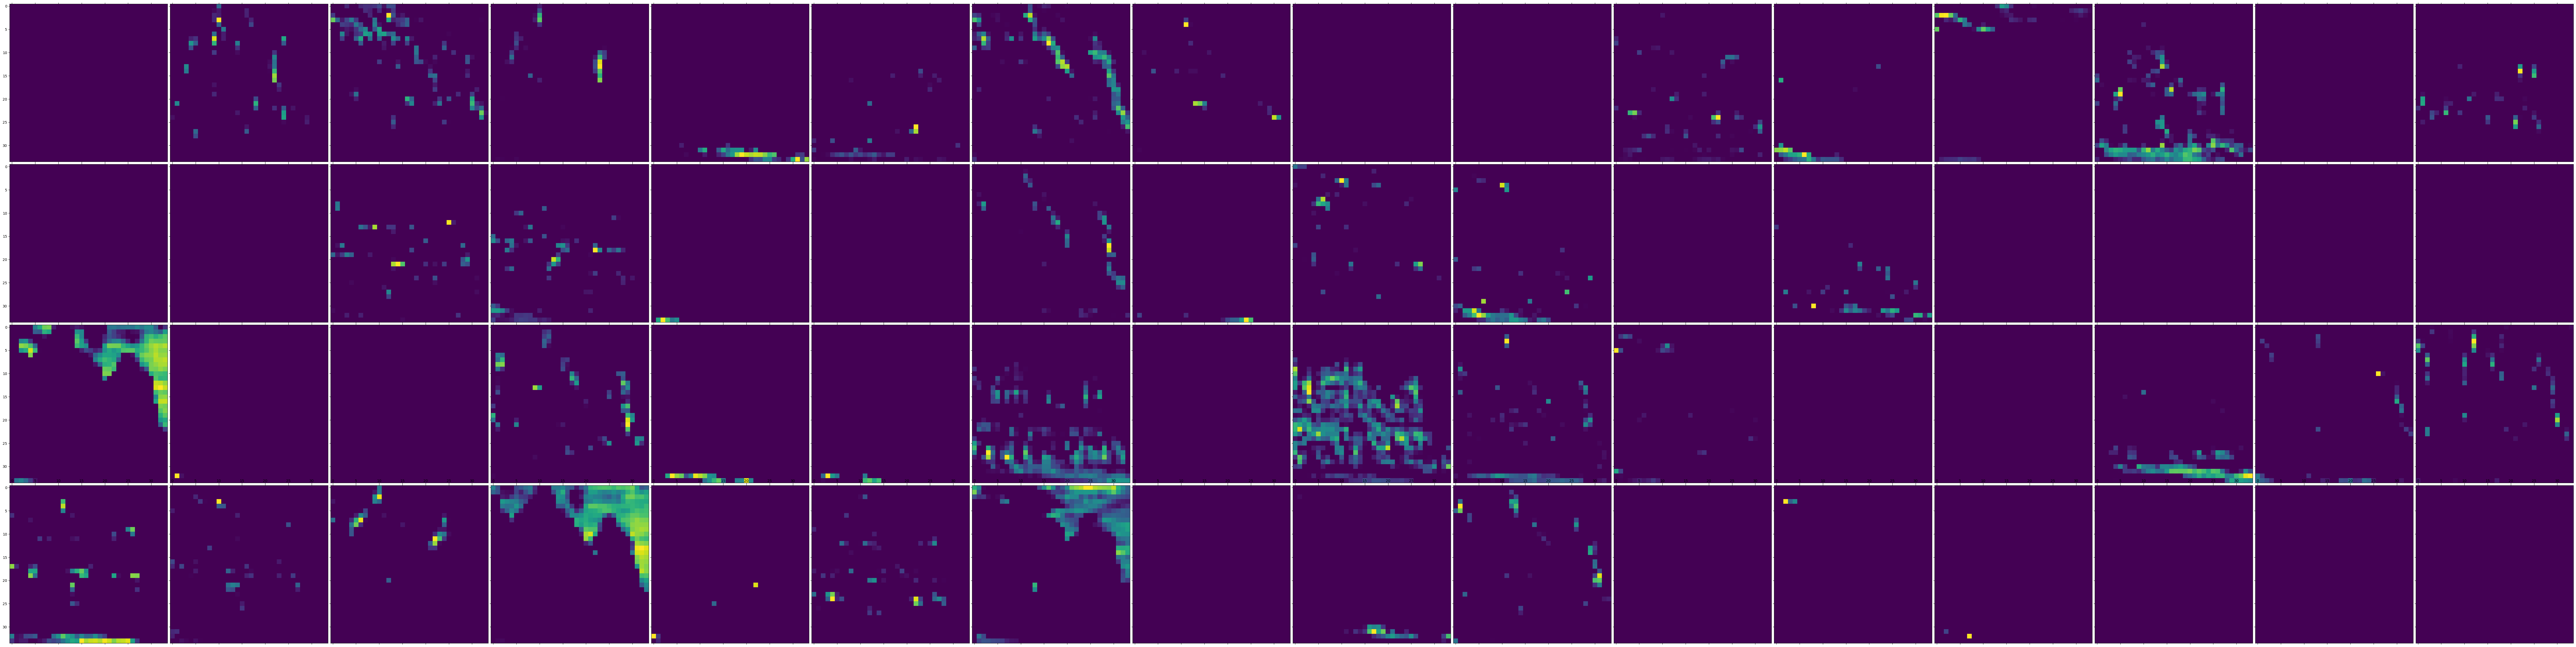

Processing max_pooling2d_7 layer...


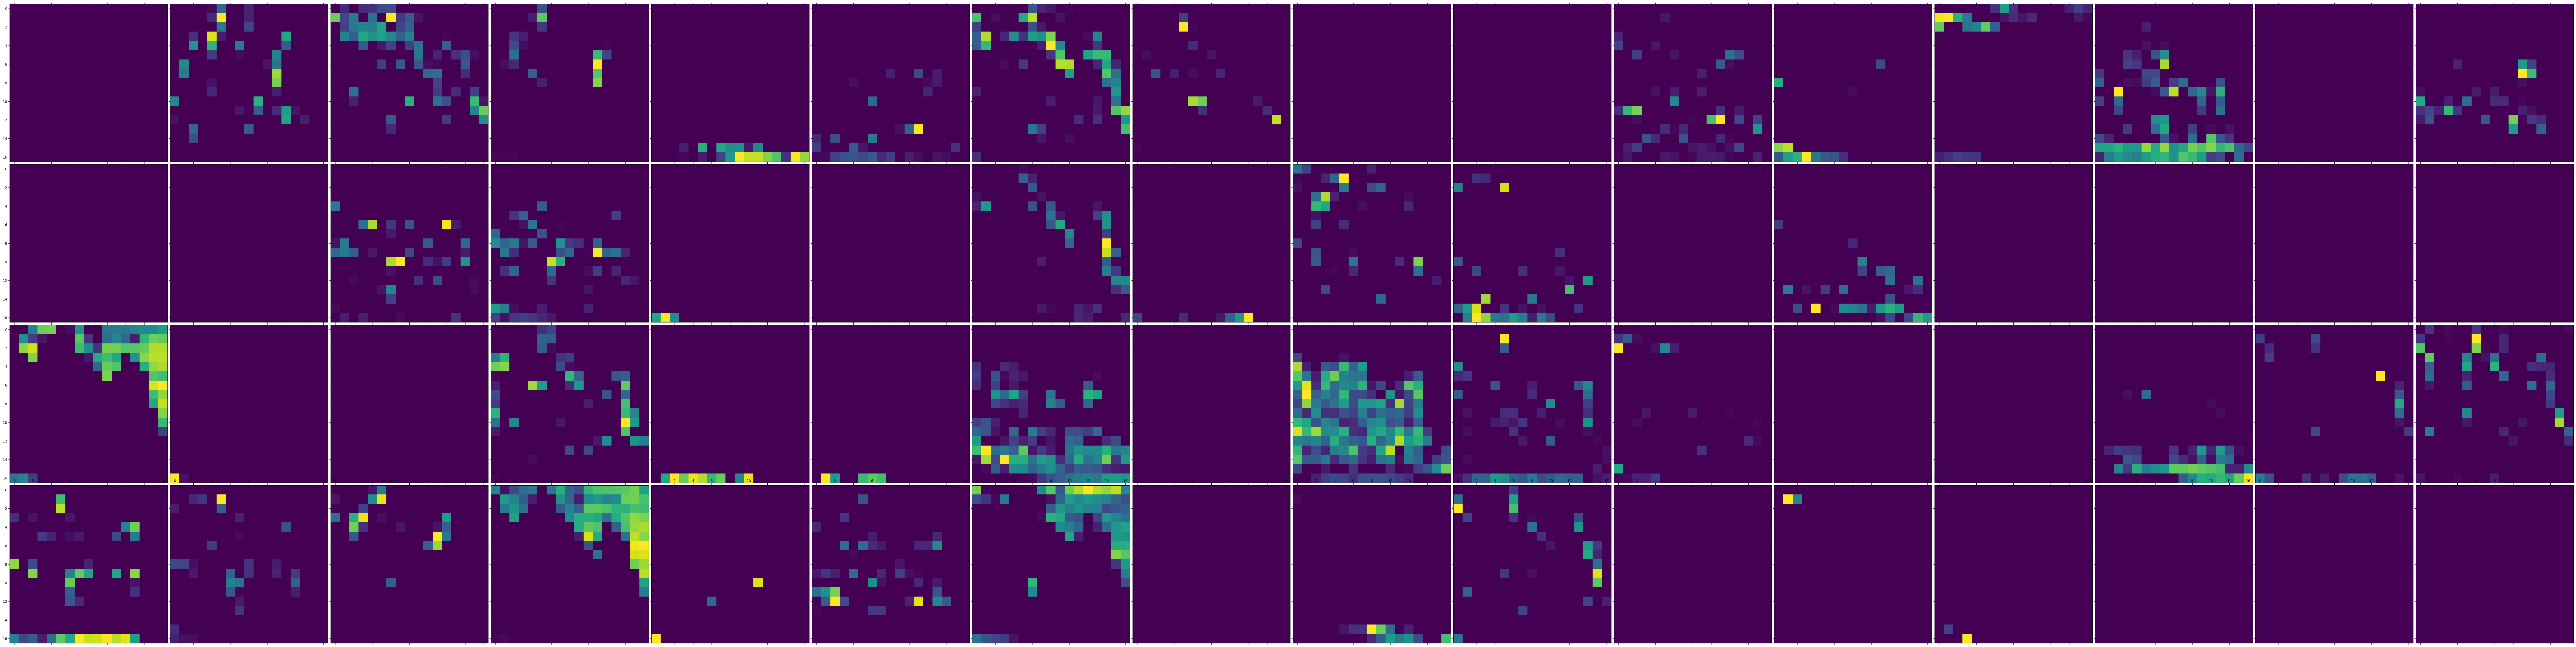

Processing conv2d_8 layer...


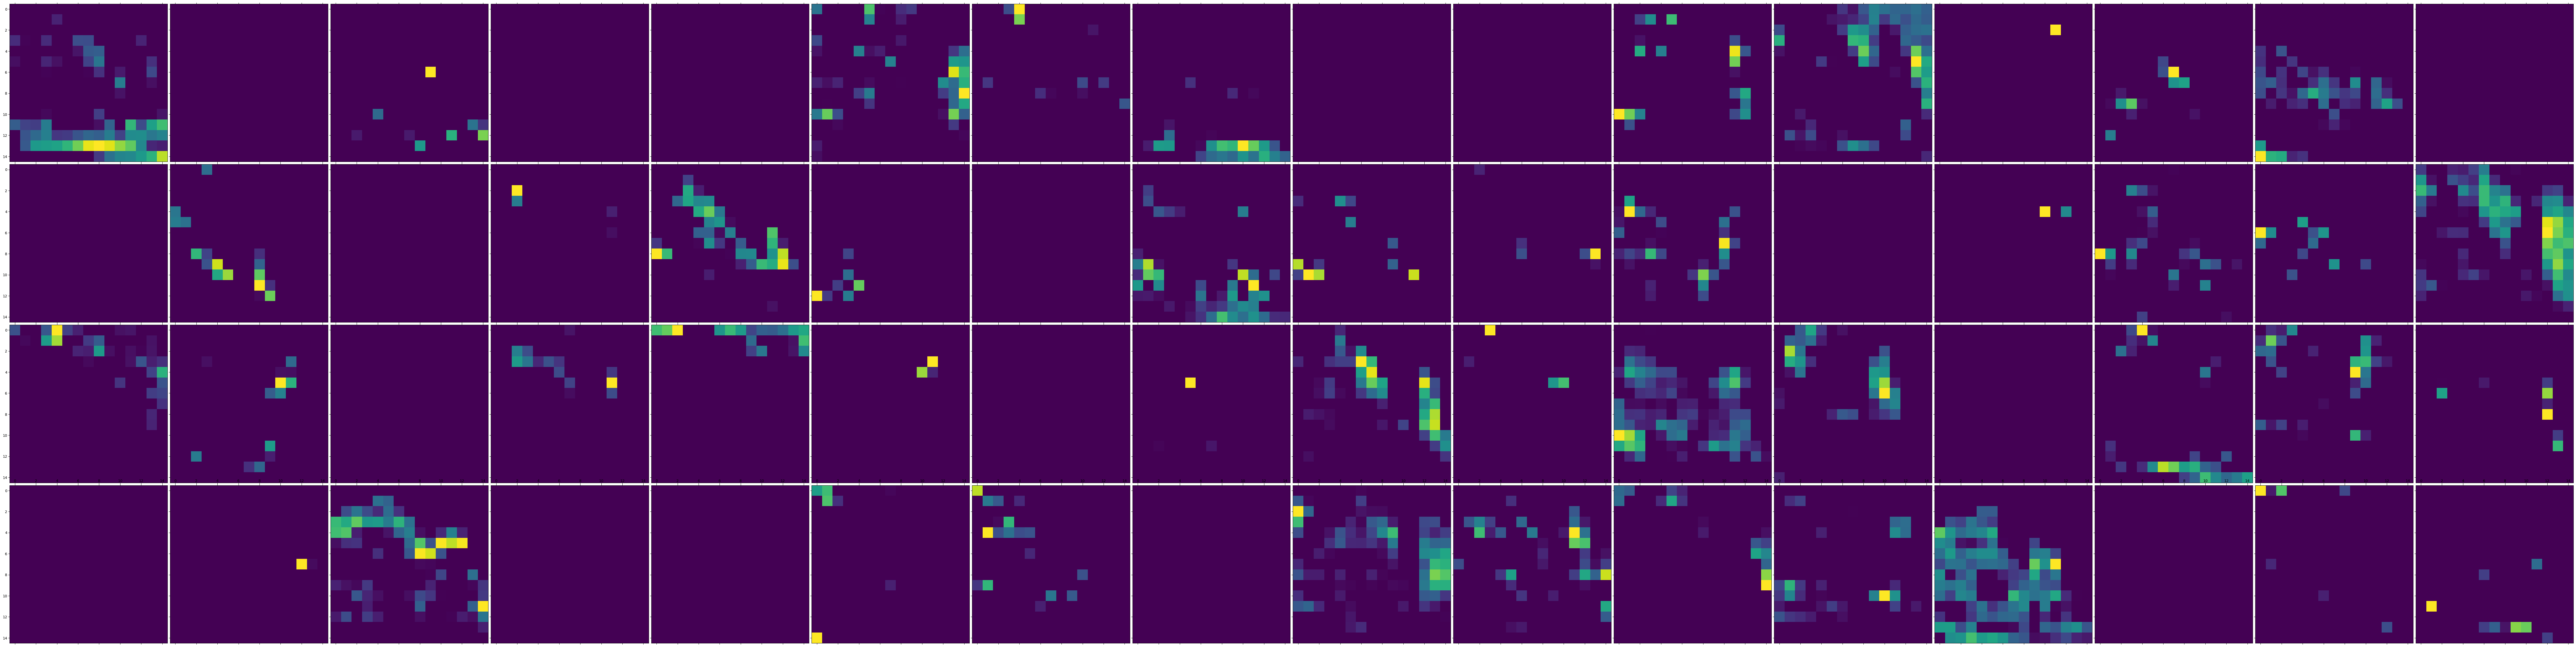

Processing max_pooling2d_8 layer...


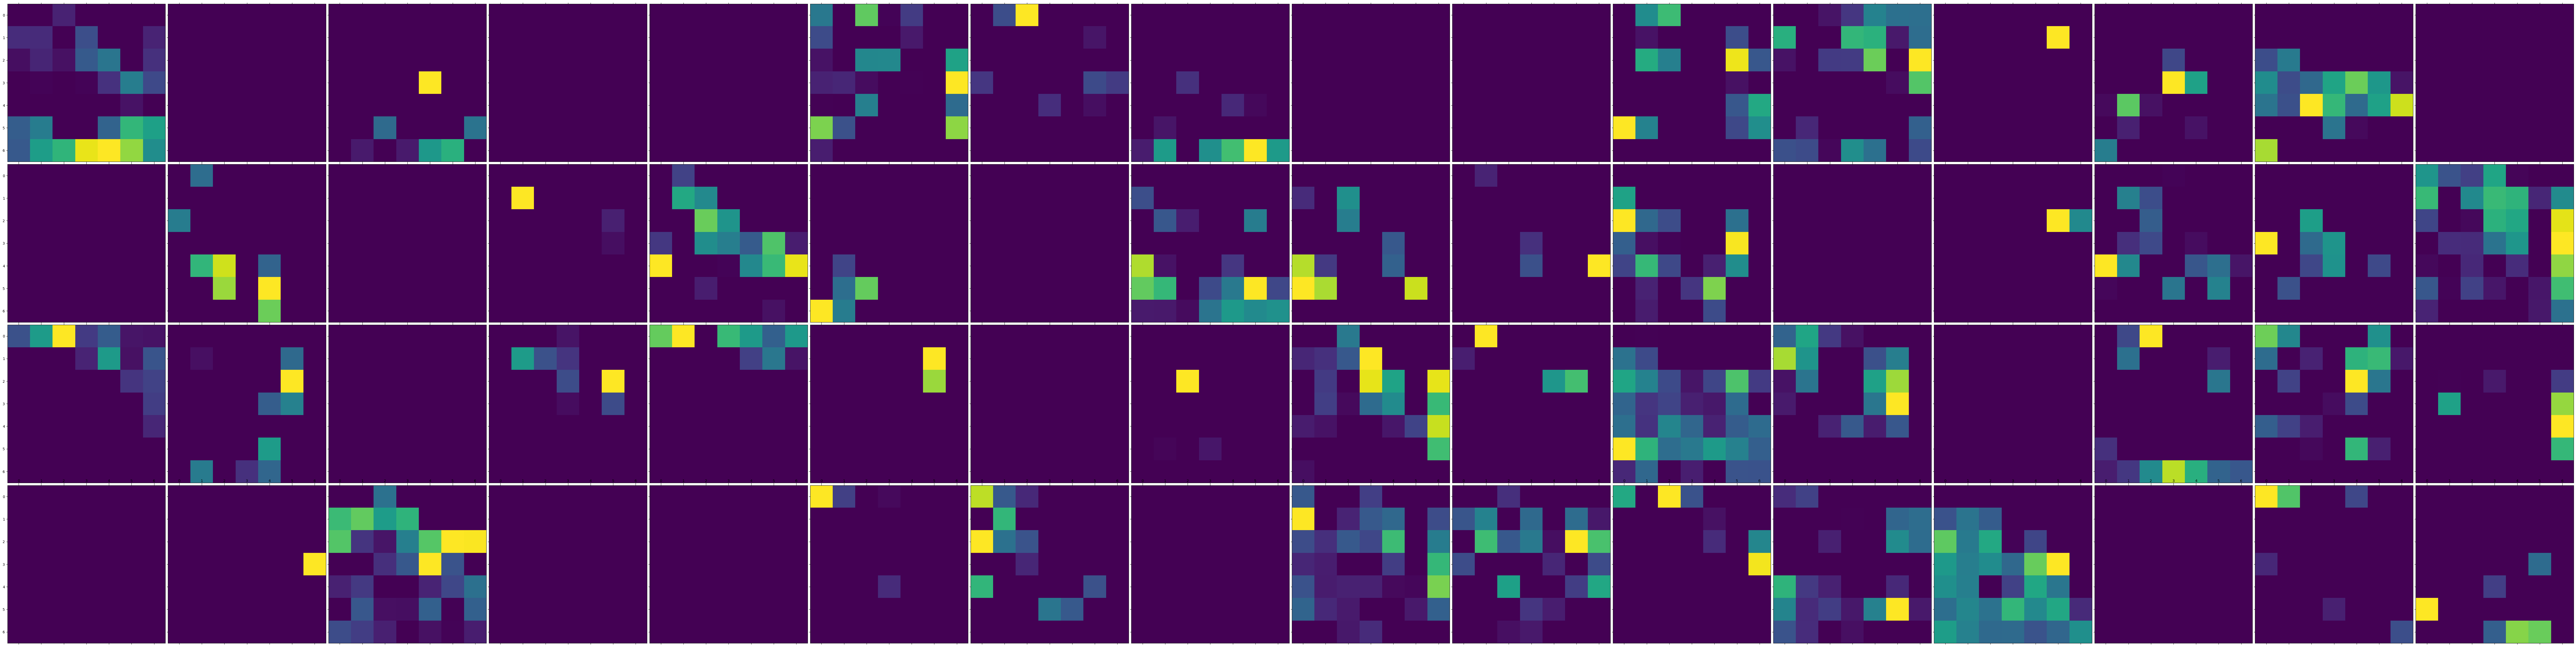

Processing conv2d_9 layer...


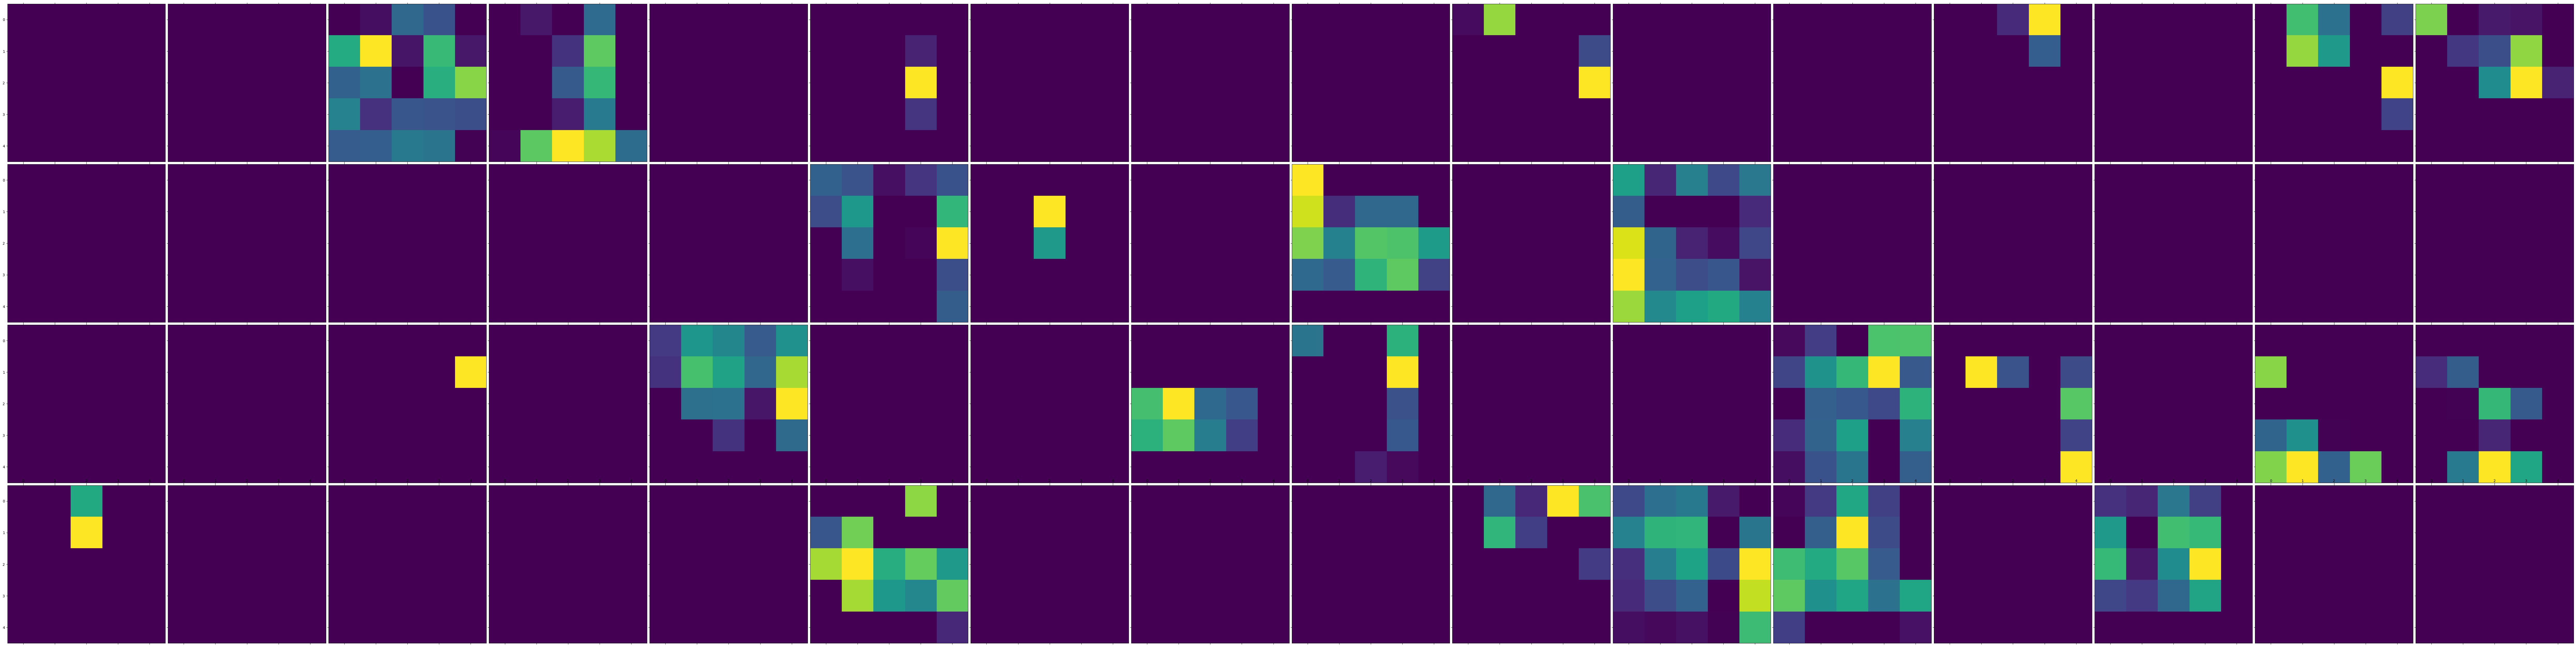

Processing max_pooling2d_9 layer...


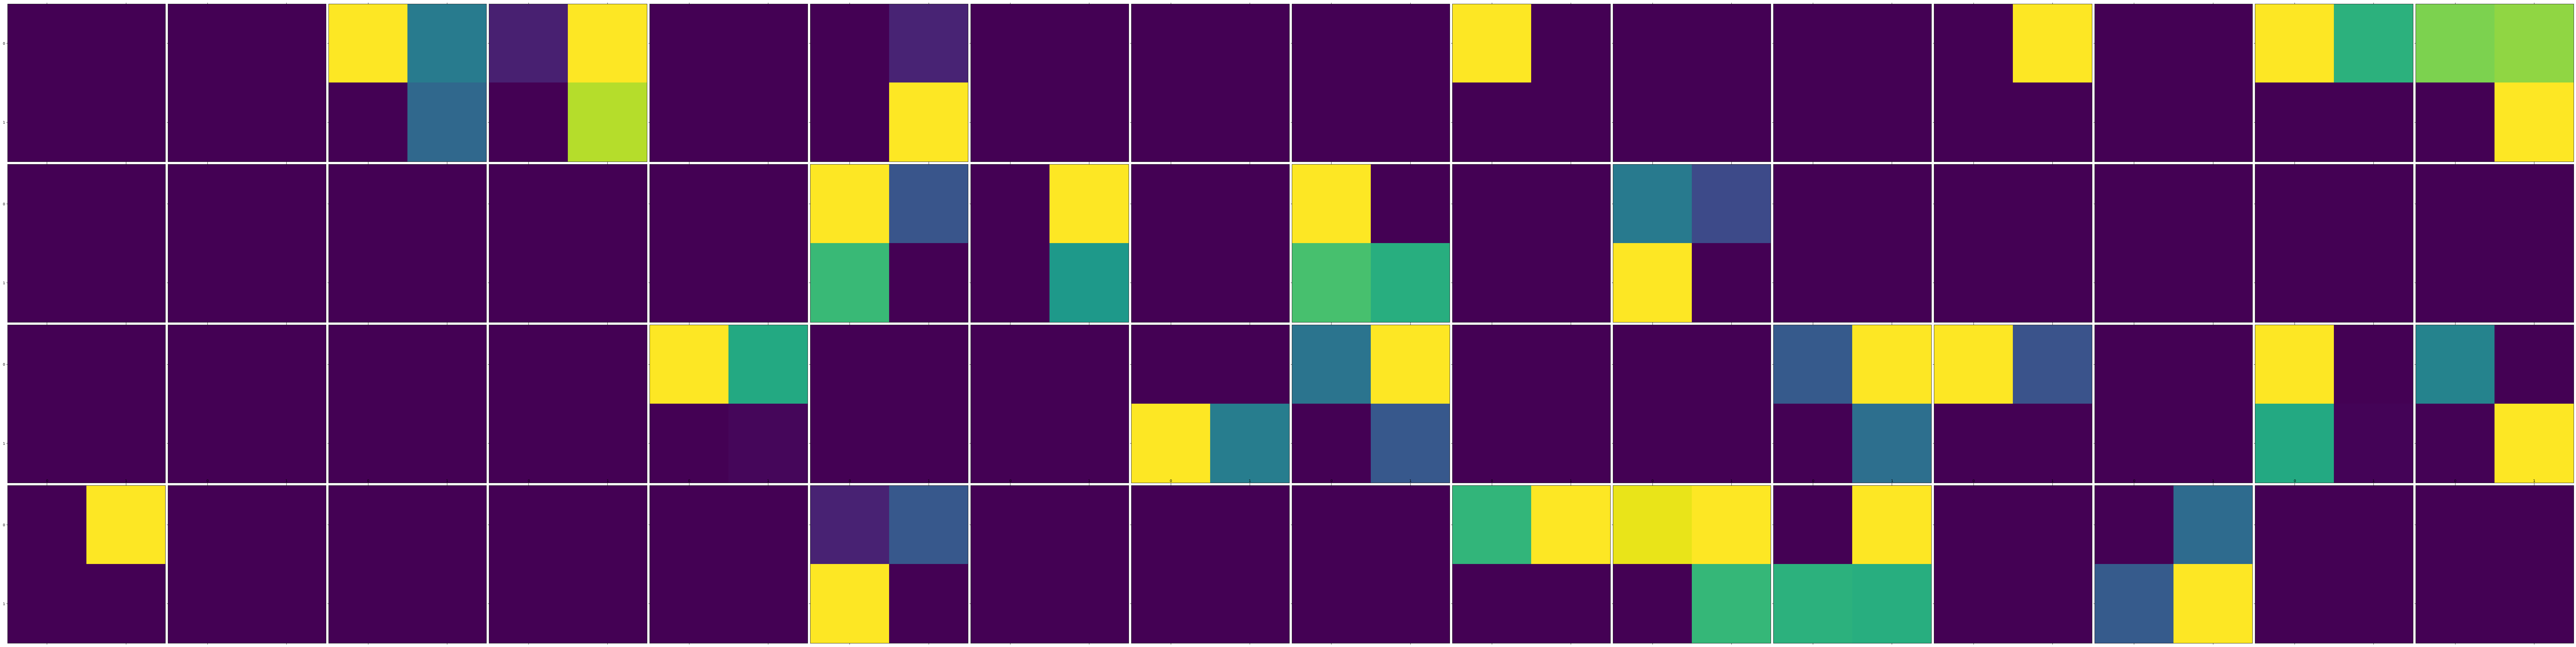

In [ ]:
from mpl_toolkits.axes_grid1 import ImageGrid
#https://matplotlib.org/stable/gallery/axes_grid1/simple_axesgrid.html

def plot_layer(name, activation):
    print("Processing {} layer...".format(name))
    how_many_features_map = activation.shape[3]

    figure_size = how_many_features_map * 2
    fig = plt.figure(figsize=(figure_size, figure_size),)

    grid = ImageGrid(fig, 111,
                     nrows_ncols=(how_many_features_map // 16, 16),
                     axes_pad=0.1,  # pad between axes in inch.
                     )
    images = [activation[0, :, :, i] for i in range(how_many_features_map)]

    for ax, img in zip(grid, images):
        # Iterating over the grid returns the Axes.
        ax.matshow(img)
    plt.show()

#for each conv2d layer plot the feature maps
for i, conv_ix in enumerate(conv_and_pool_indices):
    plot_layer(loaded_model.layers[conv_ix].name, activations[conv_ix])

# **Visualisasi Arsitektur**

In [ ]:
pip install visualkeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.0/993.0 kB 10.6 MB/s eta 0:00:00


In [ ]:
import visualkeras

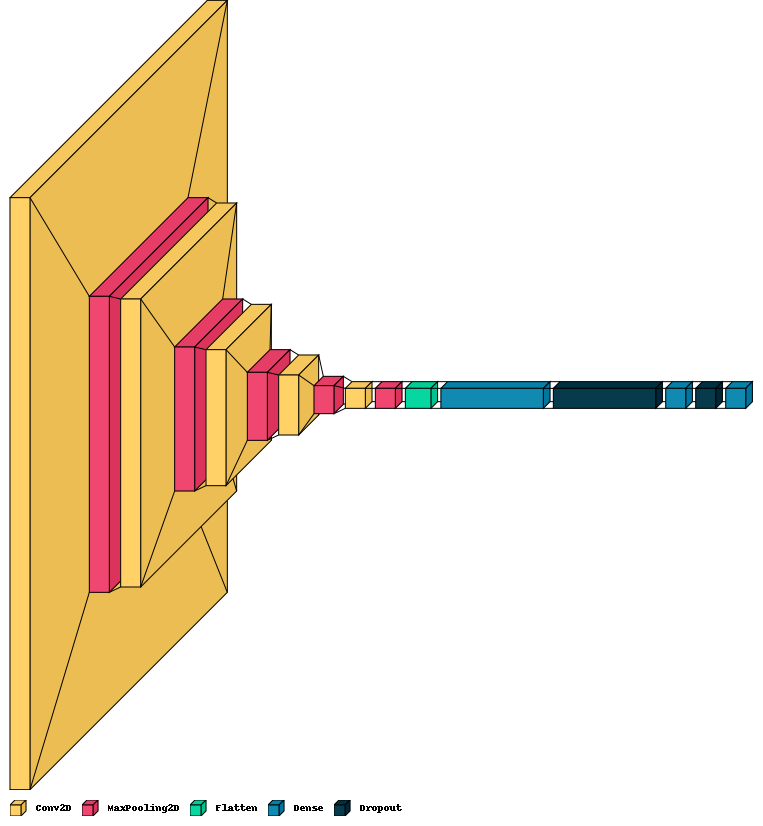

In [ ]:
visualkeras.layered_view(loaded_model, legend=True)

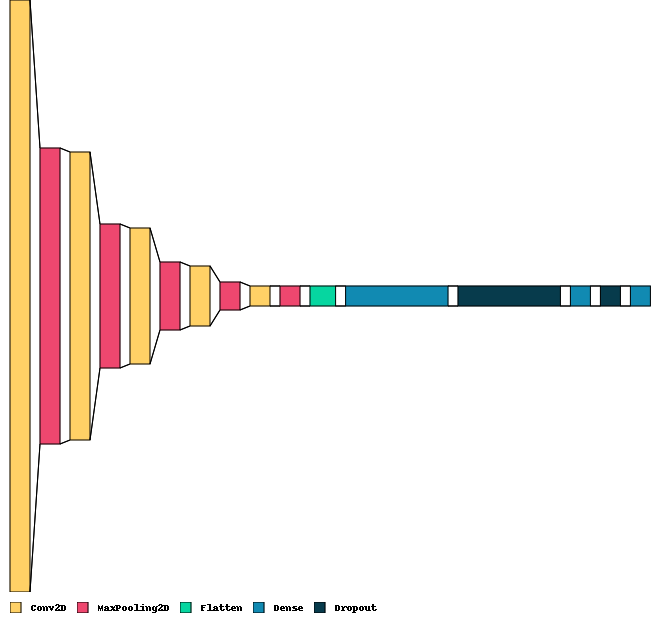

In [ ]:
visualkeras.layered_view(loaded_model, legend=True, draw_volume=False)

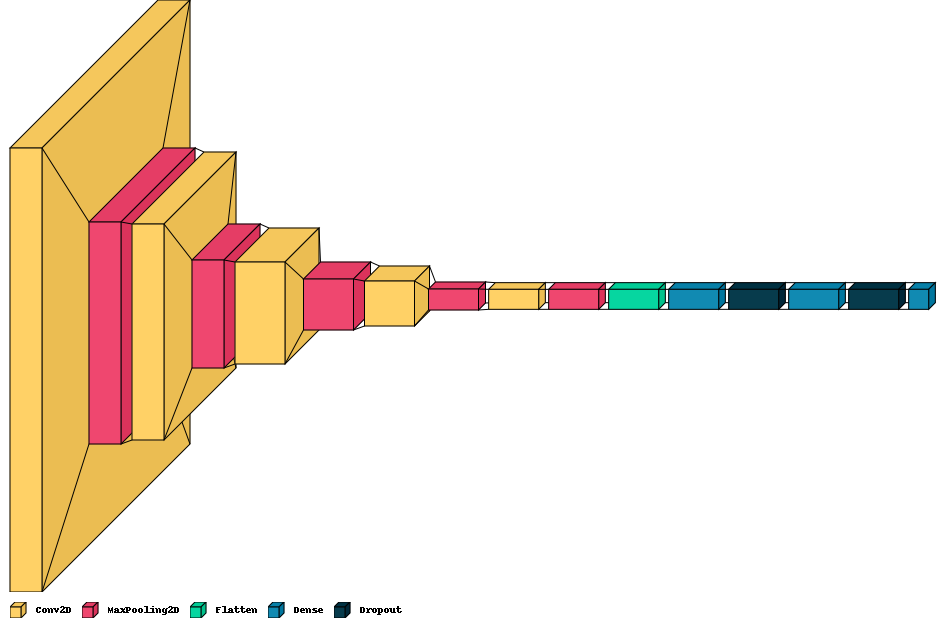

In [ ]:
visualkeras.layered_view(loaded_model, scale_xy=3,legend=True, scale_z=1, max_z=50)

In [ ]:
# visualkeras.layered_view(loaded_model, scale_xy=3,legend=True, scale_z=1, max_z=50, to_file="/content/drive/My Drive/Dataset/Visual_arsitektur.png")